Classification problem where we will predict which customer will leave the bank 

Goal: Is to learn how to build artificical neural networks with keras

In [258]:
import pandas as pd 
import numpy as np 

In [259]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [260]:
df.shape

(10000, 14)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [262]:
df.duplicated().sum()

0

In [263]:
df['Exited'].value_counts()

# 7963 are there and rest have left the bank 

Exited
0    7963
1    2037
Name: count, dtype: int64

generally while solving misclassification problems we do consider the spread of the data

here it is imbalanced which should be the concern but will move ahead 

In [264]:
df['Gender'].value_counts() # fairly balanced

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [265]:
# removing few unwanted columns 
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)


In [266]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int) # drop_first will drop first category to avoid multicollinearity . if 0 0 then last will be 0 ofc  if 1 0 then last will be 0 only  

In [267]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [268]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Exited']),df['Exited'],test_size=0.2)

In [269]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [270]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train) # transformed X_train
X_test = sc.fit_transform(X_test)

In [271]:
X_train

array([[-0.81157909, -0.27771219,  1.03567943, ..., -0.57735027,
        -0.57388614, -1.09692743],
       [-1.61889905, -0.37378144,  1.38197365, ..., -0.57735027,
        -0.57388614, -1.09692743],
       [-0.96683293, -1.04626621,  0.68938522, ..., -0.57735027,
        -0.57388614, -1.09692743],
       ...,
       [ 0.34764957, -0.08557369, -0.69579166, ..., -0.57735027,
         1.74250594, -1.09692743],
       [ 0.47185264, -0.75805845,  1.03567943, ..., -0.57735027,
        -0.57388614, -1.09692743],
       [ 1.28952286,  3.3729194 , -1.73467431, ...,  1.73205081,
        -0.57388614, -1.09692743]])

In [272]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 

In [273]:
# making sequential models 

model = Sequential() 
# here we add layers  will have 1 input layer, 1 hidden layer and 1 output layer

# for starting will keep 3 (nodes) perceptron in hidden layer
model.add(Dense(3,activation='sigmoid',input_dim = 11)) # with 11 inputs


model.add(Dense(1,activation='sigmoid')) #output layer


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [274]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [275]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [276]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.5639
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.5064
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.4835
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.4549
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 0.4423
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.4333
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.4349
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.4208
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.4268
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 0.4277


In [277]:
model.layers[0].get_weights()

[array([[-0.10039818, -0.12614143,  0.33463702],
        [ 0.71752983, -1.2418065 , -0.7292441 ],
        [ 0.02049261, -0.05048854,  0.26929867],
        [-0.09315941, -0.16466212, -0.47886732],
        [-1.1400219 , -0.14296086, -0.09971982],
        [ 0.23375057,  0.42046988, -0.37980154],
        [-0.45200565,  0.64329916,  0.34641454],
        [ 0.2632038 , -0.08070457,  0.17678764],
        [ 0.54647523, -0.15931259, -0.459675  ],
        [ 0.1668364 ,  0.1588093 , -0.05036072],
        [-0.45693117,  0.14650619,  0.40811586]], dtype=float32),
 array([-0.58889276,  0.28506997,  0.2517536 ], dtype=float32)]

In [278]:
model.layers[1].get_weights()

[array([[ 0.9367926],
        [-1.903484 ],
        [-1.2826089]], dtype=float32),
 array([-0.23248468], dtype=float32)]

In [279]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


In [280]:
# lets assume our threshold to be 0.5

y_pred = np.where(y_log>0.5,1,0)

In [281]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.797

Lets use relu and increase the hidden layer by one

will keep 11 nodes in both the hidden layers 

In [282]:

model2 = Sequential() 

model2.add(Dense(11,activation='relu',
input_dim = 11)) # with 11 inputs

model2.add(Dense(11,activation='relu'))

model2.add(Dense(1,activation='sigmoid')) #output layer


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [283]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [284]:
model2.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [285]:
dict = model2.fit(X_train,y_train,epochs=100,validation_split=0.2) # we also increased the epochs 

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.6940 - loss: 0.6035 - val_accuracy: 0.7919 - val_loss: 0.5026
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.7958 - loss: 0.4768 - val_accuracy: 0.8050 - val_loss: 0.4597
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.8174 - loss: 0.4270 - val_accuracy: 0.8131 - val_loss: 0.4361
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8330 - loss: 0.3961 - val_accuracy: 0.8238 - val_loss: 0.4169
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8327 - loss: 0.3948 - val_accuracy: 0.8319 - val_loss: 0.3982
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.8437 - loss: 0.3752 - val_accuracy: 0.8369 - val_loss: 0.3862
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8508 - loss: 0.3745 - val_accuracy: 0.8400 - val_loss: 0.3775
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.8504 - loss: 0

In [286]:
dict.history['val_loss']

[0.5026330351829529,
 0.4597224295139313,
 0.4361283779144287,
 0.4168778359889984,
 0.39819473028182983,
 0.3861618936061859,
 0.3775298595428467,
 0.3709511160850525,
 0.3662344217300415,
 0.3637705147266388,
 0.36146941781044006,
 0.3621755540370941,
 0.3574596047401428,
 0.35795652866363525,
 0.3562181890010834,
 0.35555243492126465,
 0.35486796498298645,
 0.3530815839767456,
 0.35224711894989014,
 0.35175392031669617,
 0.3511631488800049,
 0.3515945076942444,
 0.35080787539482117,
 0.3510487675666809,
 0.3503980338573456,
 0.34864866733551025,
 0.34956374764442444,
 0.35082000494003296,
 0.3483790159225464,
 0.34944209456443787,
 0.34882819652557373,
 0.34895259141921997,
 0.3485654592514038,
 0.3489164710044861,
 0.34924986958503723,
 0.3488292992115021,
 0.3482826352119446,
 0.3479675054550171,
 0.34967678785324097,
 0.3501192331314087,
 0.35089823603630066,
 0.3480271100997925,
 0.3474075198173523,
 0.34782055020332336,
 0.3484055995941162,
 0.3488715887069702,
 0.3497514724731

We can see that the training accuracy is increasing with the increase in validation
accuracy 

there is a slight difference in the validations accuracy and models accuracy, which shows there might be some overfitting 

In [287]:
model2.layers[2].get_weights()

[array([[-0.8703119 ],
        [-1.0584719 ],
        [-0.754111  ],
        [ 0.5580696 ],
        [-0.73688143],
        [ 1.19761   ],
        [-0.38683948],
        [ 0.30228934],
        [-0.7365078 ],
        [ 0.62949103],
        [ 1.2919956 ]], dtype=float32),
 array([-0.19364966], dtype=float32)]

In [288]:
y_log2 = model2.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step


In [289]:
y_pred = np.where(y_log2>0.5,1,0)

In [290]:
accuracy_score(y_test,y_pred)

0.854

In [291]:
# Thus we can see that the models accurary is improving 

In [292]:
import matplotlib.pyplot as plt 
dict.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

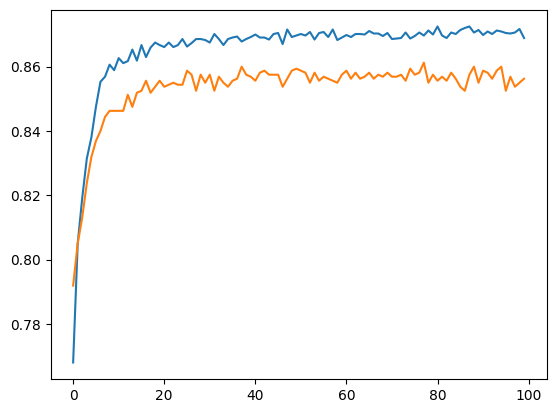

In [296]:
plt.plot(dict.history['accuracy'])
plt.plot(dict.history['val_accuracy'])

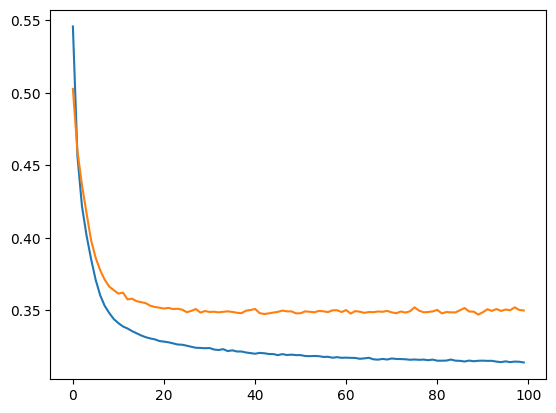

In [298]:
plt.plot(dict.history['loss'])
plt.plot(dict.history['val_loss'])